In [1]:
#config.ipynb contains all the import
%run ../global_class/config.ipynb
#it's a the multipolygone of Shanghai
%run ../global_class/getShanghai.ipynb

In [2]:
df_mobike = pd.read_pickle('../pickles/utseus-mobike-2016.pk')

In [3]:
type(df_mobike)

pandas.core.frame.DataFrame

In [4]:
df_mobike.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.49,31.28,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.32,2016-08-28 00:12,121.444,31.31,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.46,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


In [5]:
#df_mobike has no na value
print(len(df_mobike))
print(len(df_mobike.dropna()))

1023603
1023603


In [6]:
df_mobike['start_location_x'] = df_mobike['start_location_x'].apply(float)
df_mobike['start_location_y'] = df_mobike['start_location_y'].apply(float)
df_mobike['end_location_x'] = df_mobike['end_location_x'].apply(float)
df_mobike['end_location_y'] = df_mobike['end_location_y'].apply(float)

Bounded box Shanghai - finally we don't use the bounding box of Shanghai to clean the data.

```python
topSh = 31.51499
rightSh = 121.80461
bottomSh = 30.975
leftSh = 121.10157
df_mobike = df_mobike[(df_mobike['start_location_x'] >= leftSh) & (df_mobike['start_location_x'] <= rightSh) & (df_mobike['start_location_y'] >= bottomSh) & (df_mobike['start_location_y'] <= topSh)]
df_mobike = df_mobike[(df_mobike['end_location_x'] >= leftSh) & (df_mobike['end_location_x'] <= rightSh) & (df_mobike['end_location_y'] >= bottomSh) & (df_mobike['end_location_y'] <= topSh)]
```

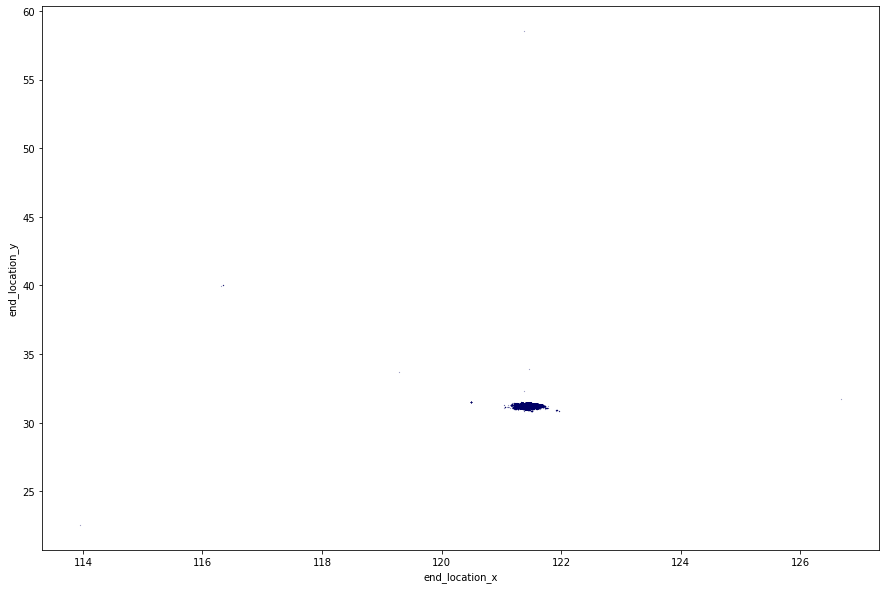

In [7]:
df_mobike.plot.scatter(x='end_location_x', y='end_location_y', s=0.02, c='#000066', figsize=(15,10))

In [8]:
df_mobike['longitude'] = df_mobike.copy().end_location_x
df_mobike['latitude'] = df_mobike.copy().end_location_y

In [9]:
gdf_mobike = gpd.GeoDataFrame(df_mobike, geometry = [Point(x,y) for x,y in zip(df_mobike.longitude, df_mobike.latitude)])
gdf_mobike.crs = {'init': 'epsg:4326'} #world degree

In [10]:
time = ManagingTime()
time.displayStartTime()

gdf_mobike = gdf_mobike.loc[gdf_mobike.within(shanghai)]

time.displayRunningTime()

Starting time: 2020-01-05 23:43:31.699767
Running time: 0:09:46.717276


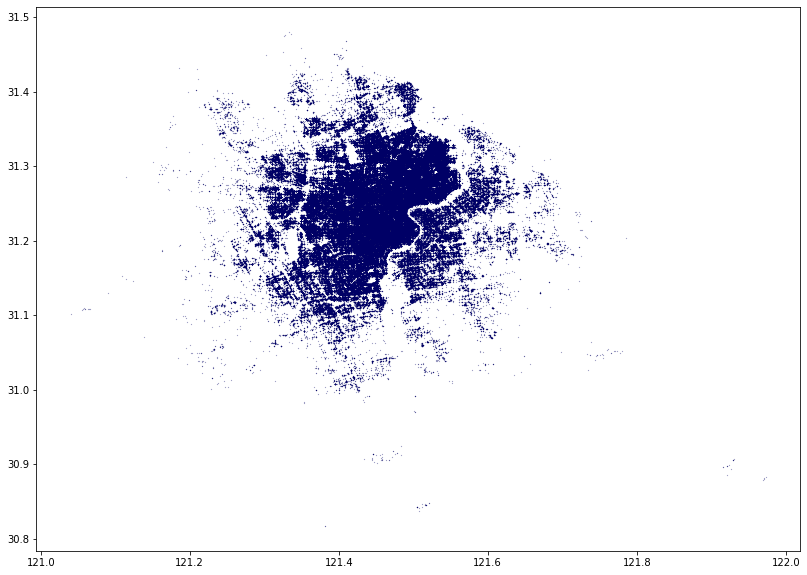

In [11]:
gdf_mobike.plot(markersize=0.02, c='#000066', figsize=(15,10))

In [12]:
print(len(gdf_mobike))
# We removed 138 points outside of Shanghai

1023552


In [13]:
gdf_mobike.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,longitude,latitude,geometry
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",121.486,31.273,POINT (121.486 31.273)
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",121.455,31.315,POINT (121.455 31.315)
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",121.419,31.156,POINT (121.419 31.156)
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",121.444,31.310,POINT (121.444 31.31)
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",121.460,31.315,POINT (121.46 31.315)


In [14]:
#No duplicated lines in mobike dataset
gdf_mobike[gdf_mobike.duplicated(keep = 'first', subset=gdf_mobike.columns.difference(['geometry']))]

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,longitude,latitude,geometry


In [15]:
gdf_mobike.start_time.max()

'2016-09-01 00:00'

In [16]:
#Calcul the number of bike per day in August
for i in range(1,32):
    if i<10:
        startDay = "2016-08-0" + str(i) + " 00:00"
        endDay = "2016-08-0" + str(i+1) + " 00:00"
        if i==9:
            endDay = "2016-08-" + str(i+1) + " 00:00"
    else:        
        startDay = "2016-08-" + str(i) + " 00:00"
        endDay = "2016-08-" + str(i+1) + " 00:00"
        if (i == 31):
            endDay = "2016-09-01 00:00"
    print("Day " + str(i) + ": " + str(len(gdf_mobike[(gdf_mobike.start_time > startDay) & (gdf_mobike.start_time < endDay)])))

Day 1: 18388
Day 2: 14897
Day 3: 18301
Day 4: 16465
Day 5: 15849
Day 6: 20997
Day 7: 21755
Day 8: 26163
Day 9: 25930
Day 10: 28802
Day 11: 29440
Day 12: 31563
Day 13: 28403
Day 14: 27471
Day 15: 33743
Day 16: 34239
Day 17: 35125
Day 18: 35727
Day 19: 37498
Day 20: 36370
Day 21: 31093
Day 22: 36706
Day 23: 38735
Day 24: 40362
Day 25: 44085
Day 26: 48036
Day 27: 47533
Day 28: 49058
Day 29: 47640
Day 30: 47981
Day 31: 54924


In [ ]:
#Print the variation of mobike usage
# With this function we detect a pic of usage starting at 7:00 and at 17:00
for i in range(1,32):
    if i<10:
        startDay = "2016-08-0" + str(i) + " 00:00"
        endDay = "2016-08-0" + str(i+1) + " 00:00"
        if i==9:
            endDay = "2016-08-" + str(i+1) + " 00:00"
    else:        
        startDay = "2016-08-" + str(i) + " 00:00"
        endDay = "2016-08-" + str(i+1) + " 00:00"
        if (i == 31):
            endDay = "2016-09-01 00:00"
    print(i)
    gdf_mobike_d = gdf_mobike[(gdf_mobike.end_time > startDay ) & (gdf_mobike.end_time < endDay )].copy()
    gdf_mobike_d['pd_time'] = pd.to_datetime(gdf_mobike_d.copy().end_time)
    %matplotlib inline
    plt.figure(figsize=(15,10))
    plt.hist(x=gdf_mobike_d.pd_time, bins=24)
    plt.show()

0    18
dtype: int64

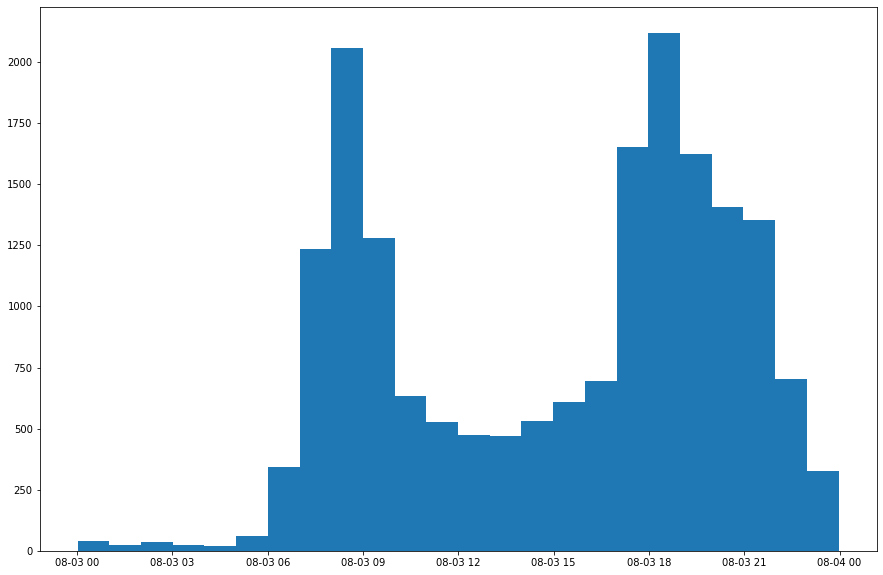

In [18]:
#example with 2016-08-03
gdf_mobike_d = gdf_mobike[(gdf_mobike.end_time > "2016-08-03 00:00") & (gdf_mobike.end_time < "2016-08-04 00:00")].copy()
gdf_mobike_d['pd_time'] = pd.to_datetime(gdf_mobike_d.copy().end_time)
plt.figure(figsize=(15,10))
test = plt.hist(x=gdf_mobike_d.pd_time, bins=24)
np.transpose(test[1]).reshape(1,25)
pd.DataFrame(np.transpose(test[0]).reshape(1,24), columns=range(0,24)).idxmax(axis=1)
# Number max of mobike at 18:00

In [19]:
gdf_mobike.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,longitude,latitude,geometry
0,1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",121.486,31.273,POINT (121.486 31.273)
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",121.455,31.315,POINT (121.455 31.315)
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",121.419,31.156,POINT (121.419 31.156)
3,10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",121.444,31.310,POINT (121.444 31.31)
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",121.460,31.315,POINT (121.46 31.315)


In [20]:
gdf_mobike['dt_time'] = pd.to_datetime(gdf_mobike.copy().end_time)
gdf_mobike.dt_time = gdf_mobike.dt_time.apply(lambda x: x.time())

In [21]:
from pyproj import Transformer

transformer = Transformer.from_crs("EPSG:4326", "EPSG:4479", always_xy=True)


def getNewLongitude(xy):
    return transformer.transform(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transformer.transform(xy[0], xy[1])[1]

gdf_mobike['start_longitude'] = gdf_mobike[['start_location_x', 'start_location_y']].apply(getNewLongitude, axis=1)
gdf_mobike['start_latitude'] = gdf_mobike[['start_location_x', 'start_location_y']].apply(getNewLatitude, axis=1)
gdf_mobike['end_longitude'] = gdf_mobike[['end_location_x', 'end_location_y']].apply(getNewLongitude, axis=1)
gdf_mobike['end_latitude'] = gdf_mobike[['end_location_x', 'end_location_y']].apply(getNewLatitude, axis=1)

In [22]:
from scipy.spatial import distance
gdf_mobike['start_time'] = pd.to_datetime(gdf_mobike['start_time'])
gdf_mobike['end_time'] = pd.to_datetime(gdf_mobike['end_time'])
gdf_mobike['duration'] = gdf_mobike['end_time'] - gdf_mobike['start_time']
gdf_mobike['distance'] = gdf_mobike[['start_longitude', 'start_latitude', 'end_longitude', 'end_latitude']].apply(
    lambda x: distance.euclidean([x[0],x[1]],[x[2],x[3]]), axis = 1)
gdf_mobike['speed'] = (gdf_mobike['distance']/1000.0)/(gdf_mobike['duration'].dt.total_seconds()/3600)

In [23]:
gdf_mobike['duration'] = gdf_mobike['duration'].dt.total_seconds()

In [24]:
gdf_mobike.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,...,latitude,geometry,dt_time,start_longitude,start_latitude,end_longitude,end_latitude,duration,distance,speed
0,1,324731,7541,2016-08-28,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",...,31.273,POINT (121.486 31.273),00:08:00,-2.849907e+06,4.652449e+06,-2.849793e+06,4.652991e+06,480.0,554.482518,4.158619
1,6,288841,4427,2016-08-28,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",...,31.315,POINT (121.455 31.315),00:17:00,-2.846641e+06,4.652220e+06,-2.846013e+06,4.652469e+06,1020.0,676.222675,2.386668
2,8,315873,6474,2016-08-28,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",...,31.156,POINT (121.419 31.156),00:14:00,-2.847670e+06,4.662305e+06,-2.847855e+06,4.662058e+06,840.0,308.195446,1.320838
3,10,93155,12616,2016-08-28,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",...,31.310,POINT (121.444 31.31),00:12:00,-2.844320e+06,4.653167e+06,-2.845270e+06,4.653261e+06,720.0,954.976245,4.774881
4,11,352484,11596,2016-08-28,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",...,31.315,POINT (121.46 31.315),00:08:00,-2.846037e+06,4.651779e+06,-2.846419e+06,4.652221e+06,480.0,584.154316,4.381157


In [25]:
gdf_mobike['longitude_m'] = gdf_mobike.copy().end_longitude
gdf_mobike['latitude_m'] = gdf_mobike.copy().end_latitude

In [26]:
gdf_mobike = gdf_mobike[['end_time','dt_time','duration','distance','speed','longitude','latitude','longitude_m','latitude_m']]

In [27]:
gdf_mobike.head()

,end_time,dt_time,duration,distance,speed,longitude,latitude,longitude_m,latitude_m
0,2016-08-28 00:08:00,00:08:00,480.0,554.482518,4.158619,121.486,31.273,-2.849793e+06,4.652991e+06
1,2016-08-28 00:17:00,00:17:00,1020.0,676.222675,2.386668,121.455,31.315,-2.846013e+06,4.652469e+06
2,2016-08-28 00:14:00,00:14:00,840.0,308.195446,1.320838,121.419,31.156,-2.847855e+06,4.662058e+06
3,2016-08-28 00:12:00,00:12:00,720.0,954.976245,4.774881,121.444,31.310,-2.845270e+06,4.653261e+06
4,2016-08-28 00:08:00,00:08:00,480.0,584.154316,4.381157,121.460,31.315,-2.846419e+06,4.652221e+06


In [28]:
gdf_mobike = gpd.GeoDataFrame(gdf_mobike, geometry = [Point(x,y) for x,y in zip(gdf_mobike.longitude_m, gdf_mobike.latitude_m)])
gdf_mobike.crs = {'init': 'epsg:4479'} #china metric projection

In [29]:
gdf_mobike.to_pickle('../clean_pickles/mobike.pk')

In [30]:
gdf_mobike = pd.read_pickle('../clean_pickles/mobike.pk')

In [31]:
#if we need to reset df_mobike
#gdf_mobike = gdf_mobike_c.copy()

In [32]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [33]:
type(gdf_target)

geopandas.geodataframe.GeoDataFrame

In [34]:
gdf_target.head()

,clean,smell,noise,longitude,latitude,geometry,longitude_m,latitude_m,surface_buffer
0,3,0.0,0.0,121.104287,31.155882,POINT (-2822207.586532274 4677635.626522204),-2.822208e+06,4.677636e+06,POLYGON ((-2821707.586532274 4677635.626522204...
1,3,1.0,0.0,121.351529,31.144327,POINT (-2842710.938446562 4665979.72602233),-2.842711e+06,4.665980e+06,"POLYGON ((-2842210.938446562 4665979.72602233,..."
2,2,0.0,0.0,121.468520,31.042285,POINT (-2855282.42475198 4665148.863744967),-2.855282e+06,4.665149e+06,"POLYGON ((-2854782.42475198 4665148.863744967,..."
3,3,0.0,0.0,121.367237,31.240725,POINT (-2841108.748930959 4660473.749148724),-2.841109e+06,4.660474e+06,POLYGON ((-2840608.748930959 4660473.749148724...
4,2,NaN,0.0,121.403601,31.269155,POINT (-2843213.856075277 4657273.732656028),-2.843214e+06,4.657274e+06,POLYGON ((-2842713.856075277 4657273.732656028...


In [35]:
#gdf_target = gpd.GeoDataFrame(df_target, geometry = 'geometry')
#gdf_target.crs = {'init': 'epsg:4479'} #china metric projection

In [36]:
#need 1h to run
time = ManagingTime()
time.displayStartTime()

gdf_target['nb_mobike_all'] = 0
gdf_target['av_mobike_duration'] = np.nan
gdf_target['av_mobike_distance'] = np.nan
gdf_target['av_mobike_speed'] = np.nan
area_buffer = gdf_target['surface_buffer'].iloc[0].area

for index,value in gdf_target.iterrows():
    clear_output()
    time.displayStartTime()
    print(index)
    gdf_mobike_temp = gdf_mobike.loc[gdf_mobike.within(value.surface_buffer)]
    gdf_target.nb_mobike_all.loc[index] = len(gdf_mobike_temp) / area_buffer
    gdf_target.av_mobike_duration.loc[index] = gdf_mobike_temp['duration'].mean()
    gdf_target.av_mobike_distance.loc[index] = gdf_mobike_temp['distance'].mean()
    gdf_target.av_mobike_speed.loc[index] = gdf_mobike_temp['speed'].mean()
    

gdf_target.to_pickle('../clean_pickles/target_mobike.pk')

time.displayEndTime()
time.displayRunningTime()

Starting time: 2020-01-06 00:15:01.882846
466
Ending time: 2020-01-06 02:00:49.105829
Running time: 1:45:47.222983


In [37]:
gdf_target.nb_mobike_all.describe()

count    461.000000
mean       0.003464
std        0.003683
min        0.000000
25%        0.000135
50%        0.002026
75%        0.005924
max        0.017665
Name: nb_mobike_all, dtype: float64

In [ ]:
gdf_target = pd.read_pickle('../clean_pickles/target.pk')

In [42]:
time = ManagingTime()
time.displayStartTime()

area_buffer = gdf_target['surface_buffer'].iloc[0].area
j=1
for i in range(0,6):
    print(str(i))
    k = (j+4)%24
    if (j == 21):
        gdf_mobike_h = gdf_mobike[(gdf_mobike.dt_time >= datetime.time(j,0,0)) | (gdf_mobike.dt_time < datetime.time(k,0,0))]
    else:
        gdf_mobike_h = gdf_mobike[(gdf_mobike.dt_time >= datetime.time(j,0,0)) & (gdf_mobike.dt_time < datetime.time(k,0,0))]
    if j<10:
        nameColumn = 'nb_mobike_0' + str(j)
    else:
        nameColumn = 'nb_mobike_' + str(j)
    if k<10:
        nameColumn += "_0" + str(k)
    else:
        nameColumn += "_" + str(k)
    gdf_target[nameColumn] = 0
    for index,value in gdf_target.iterrows():
        gdf_target[nameColumn].loc[index] = len(gdf_mobike_h.loc[gdf_mobike_h.within(value.surface_buffer)]) / area_buffer

    j = k
    gdf_target.to_pickle('../clean_pickles/target_mobike_byhours.pk')


time.displayEndTime()
time.displayRunningTime()

Starting time: 2020-01-06 10:44:35.441510
0
1
2
3
4
5
Ending time: 2020-01-06 11:44:06.215693
Running time: 0:59:30.774183


In [40]:
'''
startTime = datetime.datetime.now()

gdf_mobike_h = gdf_mobike[(gdf_mobike.dt_time >= datetime.time(21,0,0)) | (gdf_mobike.dt_time < datetime.time(1,0,0))]
nameColumn = 'nb_mobike_21_01'
gdf_target[nameColumn] = 0
for index,value in gdf_target.iterrows():
    clear_output()
    print(str(index))
    gdf_target[nameColumn].loc[index] = len(gdf_mobike_h.loc[gdf_mobike_h.within(value.surface_buffer)])

gdf_target.to_pickle('../clean_pickles/target_mobike.pk')

endTime = datetime.datetime.now()
time = endTime - startTime
print("Running time: "+str(time)) '''

'\nstartTime = datetime.datetime.now()\n\ngdf_mobike_h = gdf_mobike[(gdf_mobike.dt_time >= datetime.time(21,0,0)) | (gdf_mobike.dt_time < datetime.time(1,0,0))]\nnameColumn = \'nb_mobike_21_01\'\ngdf_target[nameColumn] = 0\nfor index,value in gdf_target.iterrows():\n    clear_output()\n    print(str(index))\n    gdf_target[nameColumn].loc[index] = len(gdf_mobike_h.loc[gdf_mobike_h.within(value.surface_buffer)])\n\ngdf_target.to_pickle(\'../clean_pickles/target_mobike.pk\')\n\nendTime = datetime.datetime.now()\ntime = endTime - startTime\nprint("Running time: "+str(time)) '

In [43]:
# Number of area where there is no mobike found.
print(len(gdf_target[gdf_target.nb_mobike_all == 0]))
print(len(gdf_target[gdf_target.nb_mobike_01_05 == 0]))
print(len(gdf_target[gdf_target.nb_mobike_05_09 == 0]))
print(len(gdf_target[gdf_target.nb_mobike_09_13 == 0]))
print(len(gdf_target[gdf_target.nb_mobike_13_17 == 0]))
print(len(gdf_target[gdf_target.nb_mobike_17_21 == 0]))
print(len(gdf_target[gdf_target.nb_mobike_21_01 == 0]))

47
105
69
61
62
59
66
